In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering,KMeans
from sklearn.linear_model import LogisticRegression
sns.set(style="white")
from sklearn.metrics import confusion_matrix,roc_auc_score, roc_curve, auc,precision_recall_curve
from sklearn.externals import joblib
from sklearn import preprocessing

In [2]:
data = pd.read_csv('../fichier_csv/billets.csv')

# Vérification de la présence de valeurs manquantes

In [3]:
sys.path.append('../../project_5_prod_market_study/code')

In [4]:
import my_functions_revue as mfct

In [5]:
mfct.verif_presence_nan_in_df(data,'data')

Il n'y a pas de valeur manquante dans data


# Vérification de la presence de doublons

In [6]:
mfct.verif_doublon(data,'data')

Absence de doublon, il n'y a pas de retraitement à faire pour data


# Vérification de la présence de valeurs aberrantes

In [7]:
data.columns

Index(['is_genuine', 'length', 'height_left', 'height_right', 'margin_low',
       'margin_up', 'diagonal'],
      dtype='object')

In [8]:
# Note : Il y a un bug avec df.boxplot quand on importe seaborn. Les outliers n'apparaissent plus. Par conséquent, il faut utiliser sns.boxplot

Text(0.5,0,'length (en mm)')

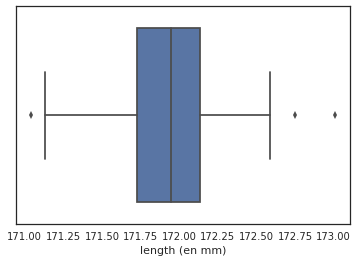

In [9]:
sns.boxplot(data['length'])
plt.xlabel('length (en mm)')

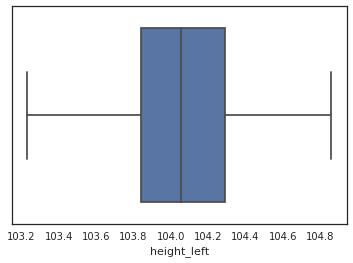

In [10]:
sns.boxplot(data['height_left'])

Text(0.5,0,'height_right (en mm)')

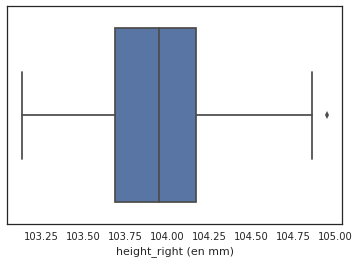

In [11]:
sns.boxplot(data['height_right'])
plt.xlabel('height_right (en mm)')

Text(0.5,0,'margin_low (en mm)')

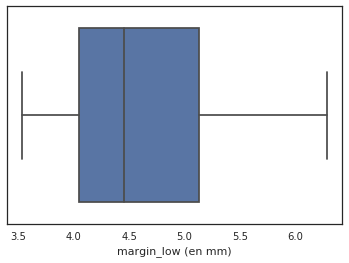

In [12]:
sns.boxplot(data['margin_low'])
plt.xlabel('margin_low (en mm)')

Text(0.5,0,'margin_up (en mm)')

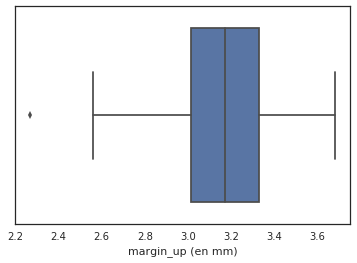

In [13]:
sns.boxplot(data['margin_up'])
plt.xlabel('margin_up (en mm)')

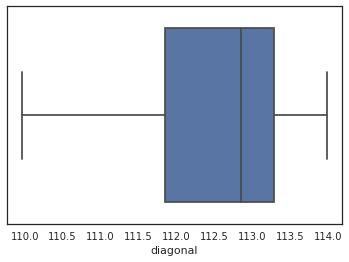

In [14]:
sns.boxplot(data['diagonal'])

# Conclusion 
3 outliers pour lenght <br/>
1 outlier pour height_right <br/>
1 outlier pour margin_up <br/>

Nous allons les laisser.

# Afin d'introduire votre analyse, effectuez une brève description des données (analyses univariées et bivariées).

## Analyses univariées

Choisir représentation : Camenbert ('camenb') ou Tuyau d'orgue ('tuyau') :camenb
Voulez-vous afficher les couleurs ? (y/n)n
affichage des couleurs non demandé
Choisir couleur du graphique :Greens
Donner le nom du titre du graphique :Répartition des billets (vrai/faux)
Donner le nom de l'axe des ordonnés du graphique :


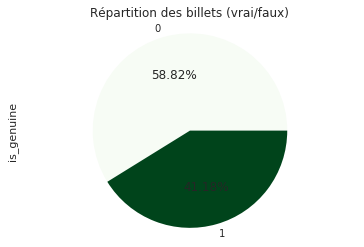

Sauvegarder l'image ? (y/n) :n
Pas de sauvegarde
Variable is_genuine :
        - Moyenne = 0.5882352941176471
        - Médiane = 1.0
        - Mode = 0    True
dtype: bool
Variable is_genuine :
        - Variance = 0.24221453287197228
        - Ecart-type = 0.4921529567847503
  is_genuine    n         f
0       True  100  0.588235
1      False   70  0.411765


In [490]:
mfct.analyse_univarie(data,'is_genuine','qual')

Voulez-vous afficher la courbe de lorenz et l'indice de gini ? (y/n)n
Mesure de concentration non affichée
Choisir représentation : Histogramme ('hist') ou BoxPlot ('boxplot') :hist
Voulez-vous afficher les couleurs ? (y/n)y
dict_items([('firebrick', '#B22222'), ('teal', '#008080'), ('lightblue', '#ADD8E6'), ('mintcream', '#F5FFFA'), ('aquamarine', '#7FFFD4'), ('darkkhaki', '#BDB76B'), ('lightsteelblue', '#B0C4DE'), ('chocolate', '#D2691E'), ('darkviolet', '#9400D3'), ('aqua', '#00FFFF'), ('darkorange', '#FF8C00'), ('lawngreen', '#7CFC00'), ('lightskyblue', '#87CEFA'), ('cornflowerblue', '#6495ED'), ('lightcyan', '#E0FFFF'), ('rosybrown', '#BC8F8F'), ('darkgoldenrod', '#B8860B'), ('slategrey', '#708090'), ('darkgrey', '#A9A9A9'), ('dimgray', '#696969'), ('fuchsia', '#FF00FF'), ('blue', '#0000FF'), ('white', '#FFFFFF'), ('snow', '#FFFAFA'), ('gray', '#808080'), ('mediumvioletred', '#C71585'), ('turquoise', '#40E0D0'), ('silver', '#C0C0C0'), ('navy', '#000080'), ('lemonchiffon', '#FFFACD

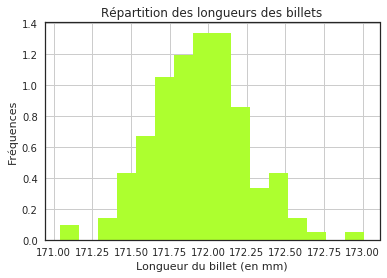

Sauvegarder l'image ? (y/n) :n
Pas de sauvegarde
Variable length :
        - Moyenne = 171.94058823529411
        - Médiane = 171.945
        
Variable length :
        - Variance = 0.09294435986159195
        - Ecart-type = 0.30486777439013124
                length  n         f         F
71  (171.038, 171.163]  1  0.005882  0.005882
52  (171.038, 171.163]  1  0.005882  0.011765
66  (171.286, 171.409]  1  0.005882  0.017647
29  (171.286, 171.409]  2  0.011765  0.029412
33  (171.409, 171.532]  2  0.011765  0.041176
75  (171.409, 171.532]  1  0.005882  0.047059
81  (171.409, 171.532]  1  0.005882  0.052941
50  (171.409, 171.532]  1  0.005882  0.058824
26  (171.409, 171.532]  2  0.011765  0.070588
79  (171.409, 171.532]  1  0.005882  0.076471
87  (171.409, 171.532]  1  0.005882  0.082353
35  (171.532, 171.656]  2  0.011765  0.094118
48  (171.532, 171.656]  1  0.005882  0.100000
40  (171.532, 171.656]  2  0.011765  0.111765
38  (171.532, 171.656]  2  0.011765  0.123529
70  (171.532, 171.6

In [15]:
mfct.analyse_vqtecont(data,'length','qtecont')

Voulez-vous afficher la courbe de lorenz et l'indice de gini ? (y/n)n
Mesure de concentration non affichée
Choisir représentation : Histogramme ('hist') ou BoxPlot ('boxplot') :boxplot
Afficher les outliers (y/n) :y
Donner le nom du titre du graphique :Réparition des hauteurs gauches
Donner le nom de l'axe des abcisses du graphique :Hauteur gauche (en mm)


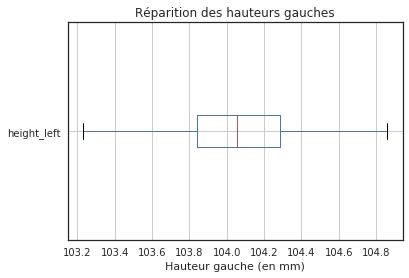

Sauvegarder l'image ? (y/n) :n
Pas de sauvegarde
La mediane est 104.055, Q1 est égal à 103.8425 et Q3 est égal à 104.2875 
            L'écart inter-quartile est égal à 0.4449999999999932 et les bornes sont respectivement de 103.23 à 104.86
Variable height_left :
        - Moyenne = 104.06635294117646
        - Médiane = 104.055
        
Variable height_left :
        - Variance = 0.08839140484429059
        - Ecart-type = 0.29730692027648903
           height_left  n         f         F
79  (103.228, 103.339]  1  0.005882  0.005882
90  (103.447, 103.556]  1  0.005882  0.011765
69  (103.447, 103.556]  1  0.005882  0.017647
47  (103.447, 103.556]  2  0.011765  0.029412
63  (103.447, 103.556]  1  0.005882  0.035294
76  (103.447, 103.556]  1  0.005882  0.041176
85  (103.556, 103.665]  1  0.005882  0.047059
86  (103.556, 103.665]  1  0.005882  0.052941
89  (103.556, 103.665]  1  0.005882  0.058824
11  (103.556, 103.665]  3  0.017647  0.076471
83  (103.556, 103.665]  1  0.005882  0.082353
6

In [16]:
mfct.analyse_vqtecont(data,'height_left','qtecont')

Voulez-vous afficher la courbe de lorenz et l'indice de gini ? (y/n)n
Mesure de concentration non affichée
Choisir représentation : Histogramme ('hist') ou BoxPlot ('boxplot') :hist
Voulez-vous afficher les couleurs ? (y/n)olivedrab
affichage des couleurs non demandé
Choisir couleur du graphique :olivedrab
Donner le nom du titre du graphique :Répartition des hauteurs droites des billets
Donner le nom de l'axe des ordonnés du graphique :
Donner le nom de l'axe des abcisses du graphique :Hauteur droite du billet


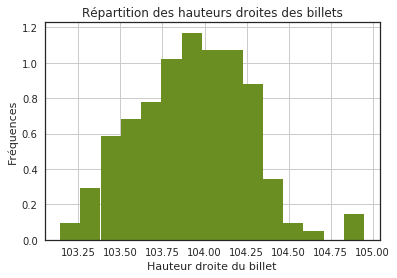

Sauvegarder l'image ? (y/n) :n
Pas de sauvegarde
Variable height_right :
        - Moyenne = 103.92811764705881
        - Médiane = 103.95
        
Variable height_right :
        - Variance = 0.10890351557093417
        - Ecart-type = 0.330005326579639
          height_right  n         f         F
94  (103.138, 103.261]  1  0.005882  0.005882
50  (103.138, 103.261]  1  0.005882  0.011765
78  (103.261, 103.381]  1  0.005882  0.017647
79  (103.261, 103.381]  1  0.005882  0.023529
56  (103.261, 103.381]  1  0.005882  0.029412
67  (103.261, 103.381]  1  0.005882  0.035294
76  (103.261, 103.381]  1  0.005882  0.041176
88  (103.261, 103.381]  1  0.005882  0.047059
86  (103.381, 103.502]  1  0.005882  0.052941
24  (103.381, 103.502]  2  0.011765  0.064706
83  (103.381, 103.502]  1  0.005882  0.070588
48  (103.381, 103.502]  1  0.005882  0.076471
18  (103.381, 103.502]  2  0.011765  0.088235
32  (103.381, 103.502]  2  0.011765  0.100000
15  (103.381, 103.502]  3  0.017647  0.117647
70  (103.5

In [17]:
mfct.analyse_vqtecont(data,'height_right','qtecont')

Voulez-vous afficher la courbe de lorenz et l'indice de gini ? (y/n)n
Mesure de concentration non affichée
Choisir représentation : Histogramme ('hist') ou BoxPlot ('boxplot') :boxplot
Afficher les outliers (y/n) :y
Donner le nom du titre du graphique :Réparition des marges basses des billets
Donner le nom de l'axe des abcisses du graphique :Marges basses des billets (en mm)


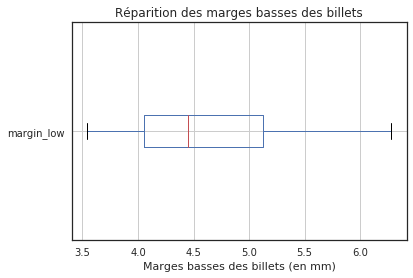

Sauvegarder l'image ? (y/n) :n
Pas de sauvegarde
La mediane est 4.45, Q1 est égal à 4.05 et Q3 est égal à 5.1275 
            L'écart inter-quartile est égal à 1.0775000000000006 et les bornes sont respectivement de 3.54 à 6.28
Variable margin_low :
        - Moyenne = 4.612117647058823
        - Médiane = 4.45
        
Variable margin_low :
        - Variance = 0.4900484567474049
        - Ecart-type = 0.7000346111067687
         margin_low  n         f         F
117  (3.537, 3.789]  1  0.005882  0.005882
119  (3.537, 3.789]  1  0.005882  0.011765
18   (3.537, 3.789]  2  0.011765  0.023529
118  (3.537, 3.789]  1  0.005882  0.029412
16   (3.537, 3.789]  2  0.011765  0.041176
89   (3.537, 3.789]  1  0.005882  0.047059
81   (3.537, 3.789]  1  0.005882  0.052941
113  (3.537, 3.789]  1  0.005882  0.058824
37   (3.537, 3.789]  1  0.005882  0.064706
52   (3.537, 3.789]  1  0.005882  0.070588
95   (3.537, 3.789]  1  0.005882  0.076471
47   (3.789, 4.038]  1  0.005882  0.082353
20   (3.789, 4.

In [18]:
mfct.analyse_vqtecont(data,'margin_low','qtecont')

Voulez-vous afficher la courbe de lorenz et l'indice de gini ? (y/n)n
Mesure de concentration non affichée
Choisir représentation : Histogramme ('hist') ou BoxPlot ('boxplot') :hist
Voulez-vous afficher les couleurs ? (y/n)n
affichage des couleurs non demandé
Choisir couleur du graphique :chartreuse
Donner le nom du titre du graphique :Répartition des marges hautes des billets
Donner le nom de l'axe des ordonnés du graphique :
Donner le nom de l'axe des abcisses du graphique :Marge haute du billet (en mm)


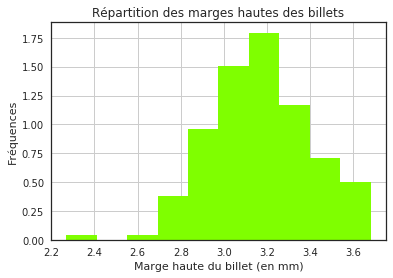

Sauvegarder l'image ? (y/n) :n
Pas de sauvegarde
Variable margin_up :
        - Moyenne = 3.1704117647058827
        - Médiane = 3.17
        
Variable margin_up :
        - Variance = 0.05553806574394464
        - Ecart-type = 0.2356651559818393
         margin_up  n         f         F
72  (2.269, 2.411]  1  0.005882  0.005882
57  (2.552, 2.693]  1  0.005882  0.011765
46  (2.693, 2.834]  2  0.011765  0.023529
51  (2.693, 2.834]  1  0.005882  0.029412
60  (2.693, 2.834]  1  0.005882  0.035294
80  (2.693, 2.834]  1  0.005882  0.041176
54  (2.693, 2.834]  1  0.005882  0.047059
25  (2.693, 2.834]  2  0.011765  0.058824
49  (2.693, 2.834]  1  0.005882  0.064706
39  (2.834, 2.975]  2  0.011765  0.076471
53  (2.834, 2.975]  1  0.005882  0.082353
36  (2.834, 2.975]  2  0.011765  0.094118
29  (2.834, 2.975]  2  0.011765  0.105882
55  (2.834, 2.975]  1  0.005882  0.111765
75  (2.834, 2.975]  1  0.005882  0.117647
8   (2.834, 2.975]  4  0.023529  0.141176
73  (2.834, 2.975]  1  0.005882  0.1470

In [19]:
mfct.analyse_vqtecont(data,'margin_up','qtecont')

Voulez-vous afficher la courbe de lorenz et l'indice de gini ? (y/n)n
Mesure de concentration non affichée
Choisir représentation : Histogramme ('hist') ou BoxPlot ('boxplot') :boxplot
Afficher les outliers (y/n) :y
Donner le nom du titre du graphique :Réparitition des diagonales des billets
Donner le nom de l'axe des abcisses du graphique :Diagonale du billet


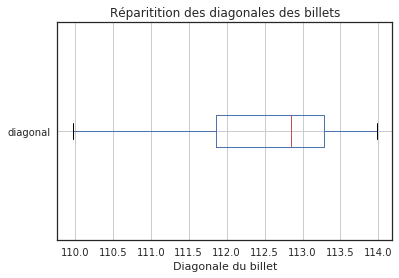

Sauvegarder l'image ? (y/n) :n
Pas de sauvegarde
La mediane est 112.845, Q1 est égal à 111.85499999999999 et Q3 est égal à 113.2875 
            L'écart inter-quartile est égal à 1.4325000000000045 et les bornes sont respectivement de 109.97 à 113.98
Variable diagonal :
        - Moyenne = 112.5704117647059
        - Médiane = 112.845
        
Variable diagonal :
        - Variance = 0.8495768892733561
        - Ecart-type = 0.9217249531575871
               diagonal  n         f         F
33   (109.966, 110.237]  1  0.005882  0.005882
89   (110.237, 110.505]  1  0.005882  0.011765
111  (110.237, 110.505]  1  0.005882  0.017647
59   (110.505, 110.772]  1  0.005882  0.023529
45   (110.505, 110.772]  1  0.005882  0.029412
92   (110.505, 110.772]  1  0.005882  0.035294
118  (110.505, 110.772]  1  0.005882  0.041176
62   (110.505, 110.772]  1  0.005882  0.047059
64   (110.505, 110.772]  1  0.005882  0.052941
66   (110.772, 111.039]  1  0.005882  0.058824
78   (110.772, 111.039]  1  0.00588

In [20]:
mfct.analyse_vqtecont(data,'diagonal','qtecont')

## Analyses bivariées

Voulez-vous afficher les couleurs ? (y/n)y
dict_items([('firebrick', '#B22222'), ('teal', '#008080'), ('lightblue', '#ADD8E6'), ('mintcream', '#F5FFFA'), ('aquamarine', '#7FFFD4'), ('darkkhaki', '#BDB76B'), ('lightsteelblue', '#B0C4DE'), ('chocolate', '#D2691E'), ('darkviolet', '#9400D3'), ('aqua', '#00FFFF'), ('darkorange', '#FF8C00'), ('lawngreen', '#7CFC00'), ('lightskyblue', '#87CEFA'), ('cornflowerblue', '#6495ED'), ('lightcyan', '#E0FFFF'), ('rosybrown', '#BC8F8F'), ('darkgoldenrod', '#B8860B'), ('slategrey', '#708090'), ('darkgrey', '#A9A9A9'), ('dimgray', '#696969'), ('fuchsia', '#FF00FF'), ('blue', '#0000FF'), ('white', '#FFFFFF'), ('snow', '#FFFAFA'), ('gray', '#808080'), ('mediumvioletred', '#C71585'), ('turquoise', '#40E0D0'), ('silver', '#C0C0C0'), ('navy', '#000080'), ('lemonchiffon', '#FFFACD'), ('lightpink', '#FFB6C1'), ('lightyellow', '#FFFFE0'), ('wheat', '#F5DEB3'), ('khaki', '#F0E68C'), ('magenta', '#FF00FF'), ('darkslategray', '#2F4F4F'), ('darkcyan', '#008B8B'), (

No handles with labels found to put in legend.


Donner le nom de l'axe des ordonnés du graphique :Hauteur droite (en mm)
Donner le nom de l'axe des abcisses du graphique :Longueur (en mm)


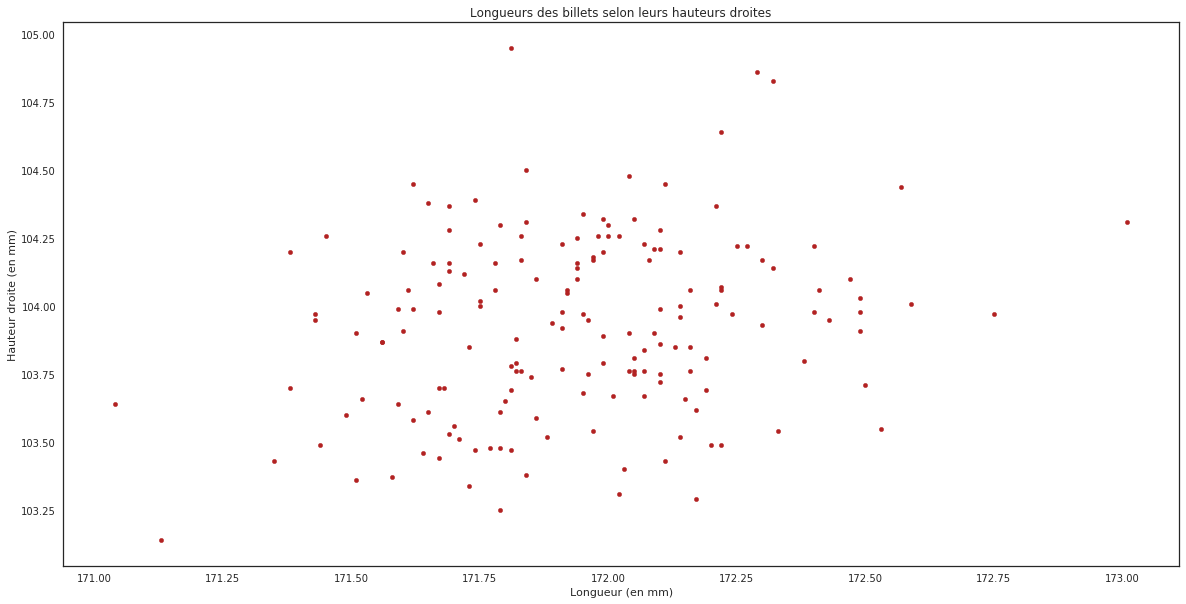

Sauvegarder l'image ? (y/n) :n
Pas de sauvegarde
Le coeficient de corrélation (Pearson) est égal à 0.22
Les variables ne sont pas positivement corrélées car 0.22 est inférieur à 0,40


In [21]:
mfct.analyse_bivariee(data,nomcaract1='length',typecaract1='qte',nomcaract2='height_right',typecaract2='qte')

Voulez-vous afficher les couleurs ? (y/n)n
affichage des couleurs non demandé
Choisir couleur du graphique :teal
Donner le nom du titre du graphique :Hauteurs gauches selon les hauteurs droites des billets
Donner le nom de la légende du graphique :


No handles with labels found to put in legend.


Donner le nom de l'axe des ordonnés du graphique :Hauteur droite (en mm)
Donner le nom de l'axe des abcisses du graphique :Hauteur gauche (en mm)


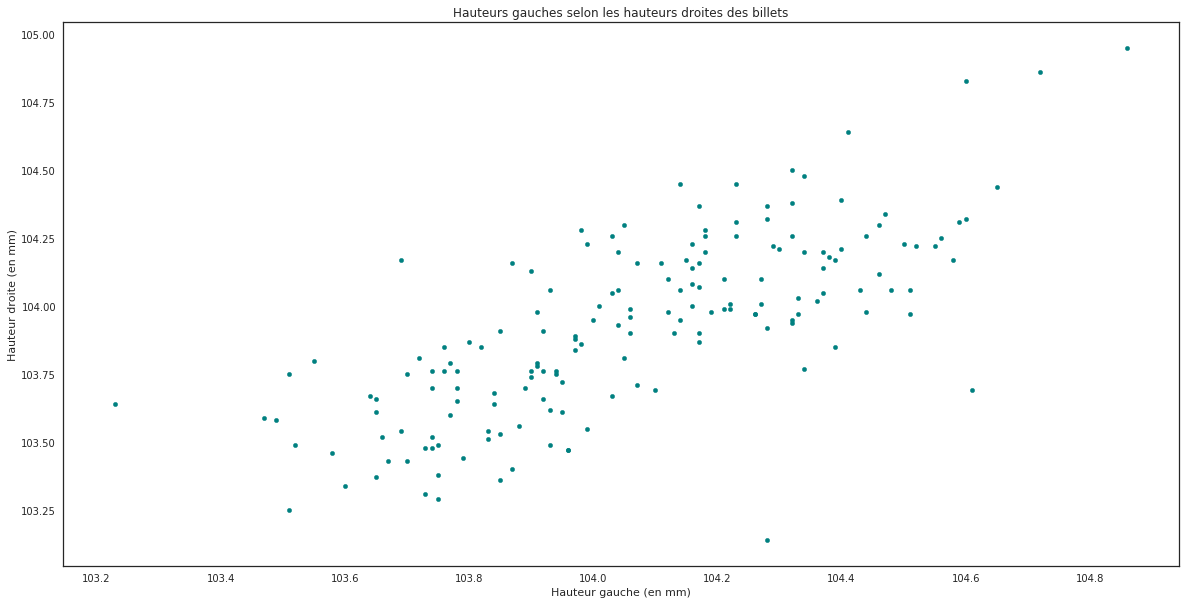

Sauvegarder l'image ? (y/n) :n
Pas de sauvegarde
Le coeficient de corrélation (Pearson) est égal à 0.73
Les variables sont corrélées positivement car 0.73 est supérieur à 0,60


In [22]:
mfct.analyse_bivariee(data,nomcaract1='height_left',typecaract1='qte',nomcaract2='height_right',typecaract2='qte')

Voulez-vous afficher les couleurs ? (y/n)n
affichage des couleurs non demandé
Choisir couleur du graphique :chocolate
Donner le nom du titre du graphique :Marges basses selon les marges hautes des billets
Donner le nom de la légende du graphique :


No handles with labels found to put in legend.


Donner le nom de l'axe des ordonnés du graphique :Marge haute (en mm)
Donner le nom de l'axe des abcisses du graphique :Marge basse (en mm)


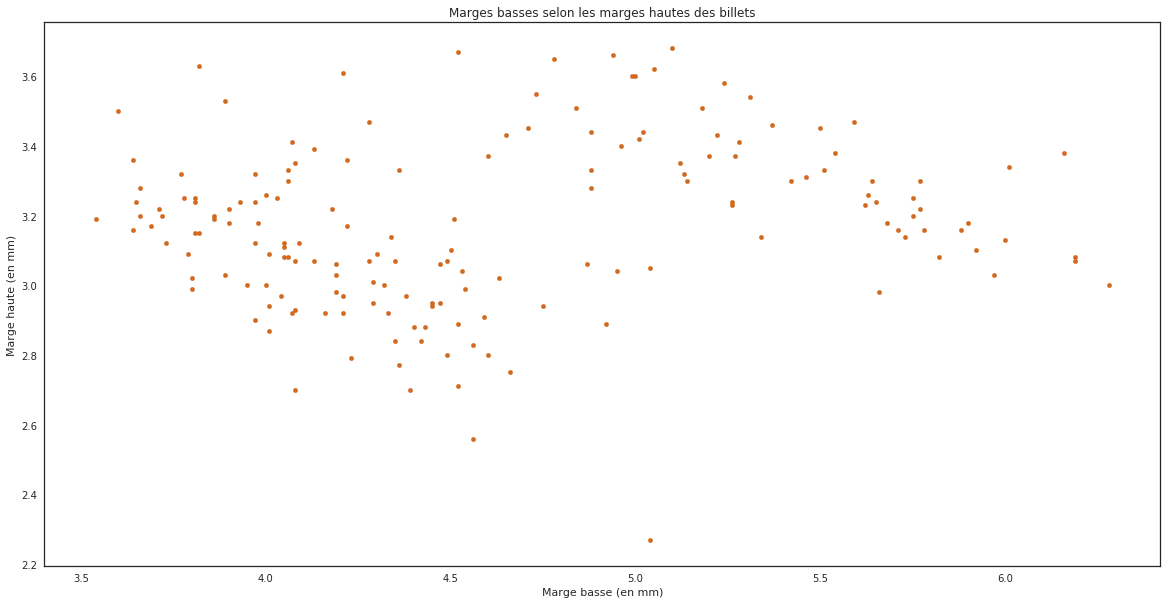

Sauvegarder l'image ? (y/n) :n
Pas de sauvegarde
Le coeficient de corrélation (Pearson) est égal à 0.17
Les variables ne sont pas positivement corrélées car 0.17 est inférieur à 0,40


In [23]:
mfct.analyse_bivariee(data,nomcaract1='margin_low',typecaract1='qte',nomcaract2='margin_up',typecaract2='qte')

Voulez-vous afficher les couleurs ? (y/n)n
affichage des couleurs non demandé
Choisir couleur du graphique :mediumseagreen
Donner le nom du titre du graphique :Marges basses des billets selon leurs diagonales
Donner le nom de la légende du graphique :


No handles with labels found to put in legend.


Donner le nom de l'axe des ordonnés du graphique :diagonales (en mm)
Donner le nom de l'axe des abcisses du graphique :marges basses (en mm)


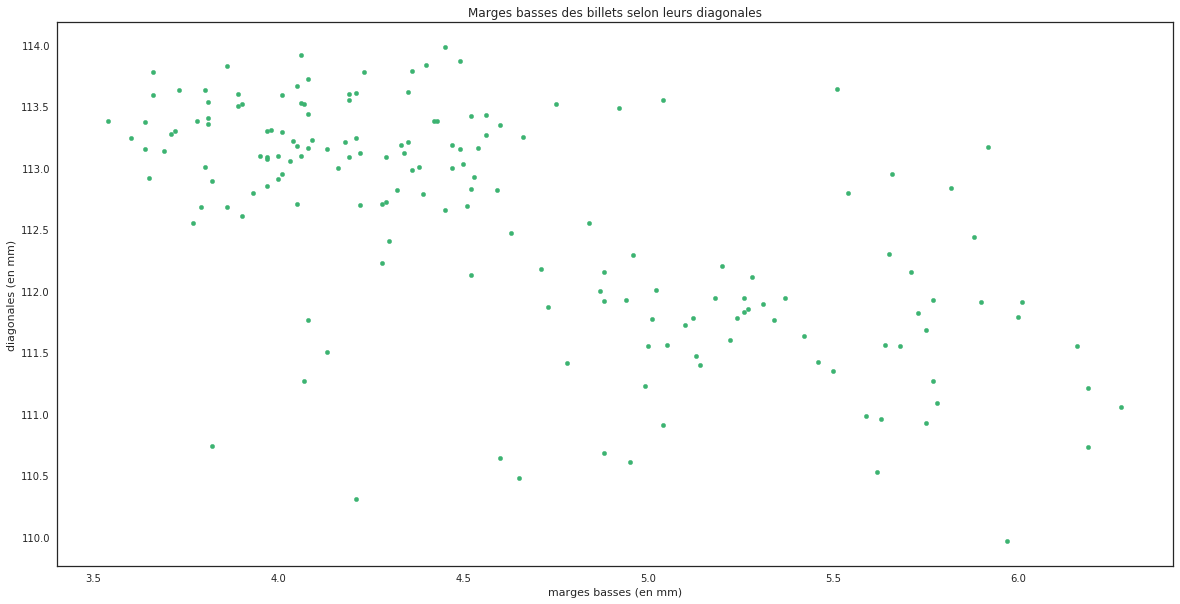

Sauvegarder l'image ? (y/n) :n
Pas de sauvegarde
Le coeficient de corrélation (Pearson) est égal à -0.64
Les variables sont négativement corrélées car -0.64 est inférieur à -0,60


In [16]:
mfct.analyse_bivariee(data,nomcaract1='margin_low',typecaract1='qte',nomcaract2='diagonal',typecaract2='qte')

# Standardisation des données

In [337]:
valeurs = data.iloc[:,[1,2,3,4,5,6]]

In [338]:
etiquettes = data['is_genuine']

In [339]:
data.columns

Index(['is_genuine', 'length', 'height_left', 'height_right', 'margin_low',
       'margin_up', 'diagonal'],
      dtype='object')

In [340]:
std_scale = preprocessing.StandardScaler().fit(valeurs)

In [341]:
joblib.dump(std_scale, '../code/algo_std.pkl')

['../code/algo_std.pkl']

In [342]:
valeurs_std = std_scale.transform(valeurs)

In [343]:
df_valeurs_std = pd.DataFrame(valeurs_std,columns = ['length', 'height_left', 'height_right', 'margin_low','margin_up','diagonal'])

In [344]:
df_valeurs_std['is_genuine'] = etiquettes

In [345]:
data = df_valeurs_std.copy()

# Vous réaliserez une Analyse en Composantes Principales de l'échantillon, en suivant toutes ces étapes :

    Analyse de l'éboulis des valeurs propres
    Représentation des variables par le cercle des corrélations
    Représentation des individus par les plans factoriels
    Analyser la qualité de représentation et la contribution des individus.

Pour chacune de ces étapes, commentez les résultats obtenus. La variable donnant la nature Vrai/Faux du billet sera utilisée comme variable illustrative.

Il faut normé les variables avant de faire une ACP 

normé une variable = 
- centrée la variable  (on fait en sorte que sa moyenne est égale à 0)= soustraite sa moyenne
- reduire la variable (fait en sorte que sa variance = 1)

## Analyse de l'éboulis des valeurs propres

In [346]:
data_acp = data.copy()
data_acp_ind = data.copy()
data_acp.index = data_acp['is_genuine']
del data_acp['is_genuine']

In [347]:
X = data_acp.values

Choix du nombre d'axe : 
2 critères : 
Critère du coude : sur l’eboulis des valeurs propres, on observe un 
décrochement (coude) suivi d’une décroissance  régulière. On sélectionne les axes avant le décrochement.

Critère de Kaiser: on ne retient que les axes dont l’inertie est supérieure à l’inertie moyenne I/p (un peu étroit). 
Kaiser en ACP normée:  I/p= 1 : On ne retiendra que les axes associés à des valeurs propre supérieures à 1

In [348]:
X.shape

(170, 6)

In [349]:
n_components = 3

In [350]:
pca = PCA(n_components=n_components)
reduction = pca.fit_transform(X)
reduction.shape

(170, 3)

In [351]:
pca.components_

array([[ 0.07327499,  0.47550205,  0.4918214 ,  0.43102671,  0.35253984,
        -0.46537288],
       [ 0.77963908,  0.33925019,  0.23554253, -0.32053699, -0.14111974,
         0.31453645],
       [-0.08889419,  0.12276016,  0.15383022,  0.5128076 , -0.82114881,
         0.12691346]])

In [352]:
pca.explained_variance_ratio_

array([0.47447921, 0.21957106, 0.14234524])

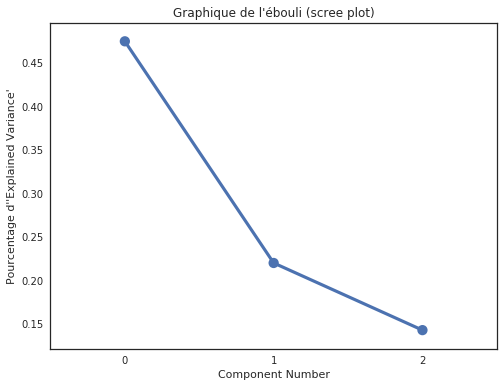

In [353]:
ind = np.arange(0, n_components)
(fig, ax) = plt.subplots(figsize=(8, 6))
sns.pointplot(x=ind, y=pca.explained_variance_ratio_)
ax.set_title("Graphique de l'ébouli (scree plot)")
ax.set_xticks(ind)
ax.set_xticklabels(ind)
ax.set_xlabel('Component Number')
ax.set_ylabel("Pourcentage d''Explained Variance'")

fig.savefig('../presentation/images/graphe_ebouli')
plt.show()

Selon le critère du coude on retiendra deux axes.

Définition : Les valeurs propres de la matrice de corrélation, ou de la matrice de covariance des variables actives jouent un rôle important dans le calcul des composantes principales. En plus de déterminer les coordonnées factorielles des variables et individus, elles donnent une assez bonne idée de la variance expliquée par le nombre de facteurs donné. Cette information peut de plus être utilisée pour déterminer l'ordre dans lequel vous pouvez proposer de réduire les dimensions de l'espace original des variables ou individus, sans perdre beaucoup d'information.

##     Représentation des variables par le cercle des corrélations


In [354]:
for i in range(0, n_components):
    data_acp_ind['PC' + str(i + 1)] = reduction[:, i]

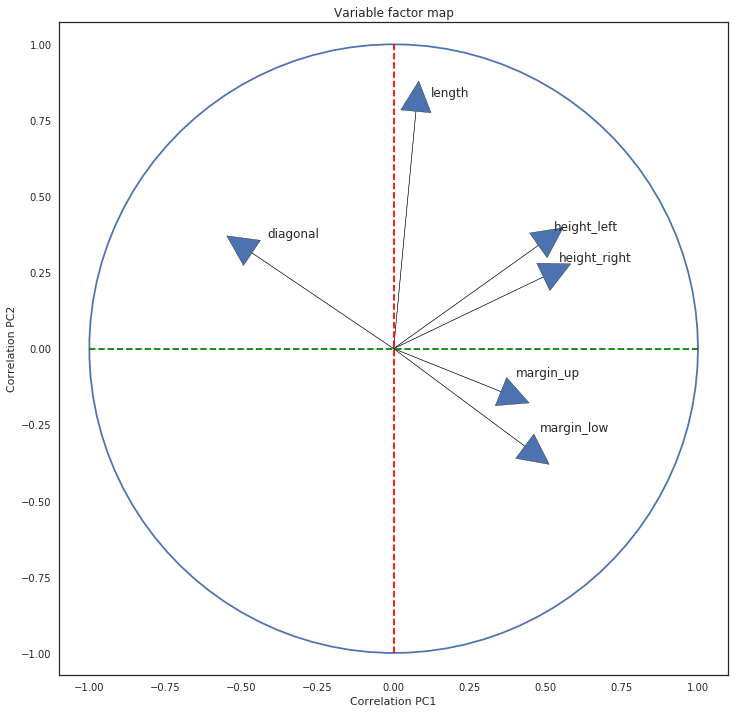

In [355]:
# Plot a variable factor map for the first two dimensions.
(fig, ax) = plt.subplots(figsize=(12, 12))
for i in range(0, len(pca.components_.T)):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[0, i],  #0 for PC1
             pca.components_[1, i],  #1 for PC2
             head_width=0.1,
             head_length=0.1)

    plt.text(pca.components_[0, i] + 0.05,
         pca.components_[1, i] + 0.05,
         data_acp.columns.values[i])

an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')

ax.set_title('Variable factor map')
plt.xlabel('Correlation PC1')
plt.ylabel('Correlation PC2')
plt.plot([0,0],[-1, 1], 'r--')
#plt.text
plt.plot([-1,1],[0, 0], 'g--')
plt.show()

fig.savefig('../presentation/images/cercle_correl')

# Direction du vecteur 
#Longueur du vecteur

Définition : un cercle de cercle de corrélation défini par deux composantes principales est la représentation graphique des variables en fonction de leurs coefficients de corrélation avec les composantes principales


    Les variables positivement corrélées sont regroupées.
    Les variables négativement corrélées sont positionnées sur les côtés opposés de l’origine du graphique (quadrants opposés).
    La distance entre les variables et l’origine mesure la qualité de représentation des variables. Les variables qui sont loin de l’origine sont bien représentées par l’ACP.


##     Représentation des individus par les plans factoriels


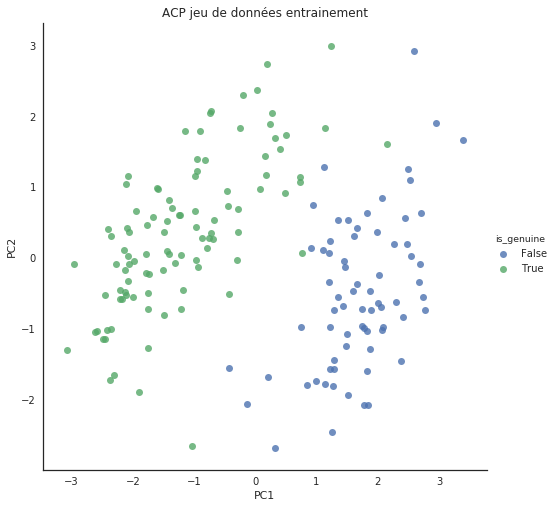

In [356]:
g = sns.lmplot('PC1',
               'PC2',
               hue='is_genuine',data=data_acp_ind,
               fit_reg=False,
               scatter=True,
               size=7)
plt.title('ACP jeu de données entrainement')

g.savefig('../presentation/images/acp_data_training')


## La contribution des variables


In [357]:
pca.explained_variance_ratio_

array([0.47447921, 0.21957106, 0.14234524])

In [358]:
contrib_var = pca.components_.T * np.sqrt(pca.explained_variance_)
df_contrib_var = pd.DataFrame(data = contrib_var, columns = ['principal component 1', 'principal component 2','Other component'],index=data_acp.columns)
df_contrib_var

,principal component 1,principal component 2,Other component
length,0.124000,0.897507,-0.082395
height_left,0.804670,0.390539,0.113785
height_right,0.832286,0.271153,0.142584
margin_low,0.729406,-0.368997,0.475316
margin_up,0.596587,-0.162455,-0.761115
diagonal,-0.787529,0.362089,0.117635


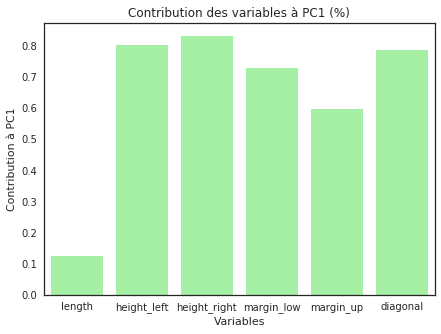

In [359]:
df_contrib_var_ind=df_contrib_var.abs().reset_index()
f,ax = plt.subplots(figsize=(7,5))
contrib_var_plot_1 = sns.barplot(x='index',y='principal component 1',data=df_contrib_var_ind,color='palegreen')
ax.set_title('Contribution des variables à PC1 (%)')
ax.set_ylabel('Contribution à PC1')
ax.set_xlabel('Variables')

f.savefig('../presentation/images/contrib_var_pc1')


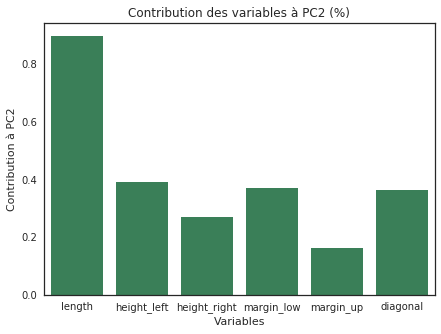

In [360]:
f,ax = plt.subplots(figsize=(7,5))
contrib_plot = sns.barplot(x='index',y='principal component 2',data=df_contrib_var_ind,color='seagreen')
ax.set_title('Contribution des variables à PC2 (%)')
ax.set_ylabel('Contribution à PC2')
ax.set_xlabel('Variables')

f.savefig('../presentation/images/contrib_var_pc2')


## Analyser la qualité de représentation de la variable



La qualité de représentation des variables sur la carte de l’ACP s’appelle cos2 (cosinus carré).


Notez que,

    Un cos2 élevé indique une bonne représentation de la variable sur les axes principaux en considération. Dans ce cas, la variable est positionnée à proximité de la circonférence du cercle de corrélation.

    Un faible cos2 indique que la variable n’est pas parfaitement représentée par les axes principaux. Dans ce cas, la variable est proche du centre du cercle.



In [361]:
total = np.square(df_contrib_var).sum()
qual_repre_var = np.square(df_contrib_var)/total
qual_repre_var

,principal component 1,principal component 2,Other component
length,0.005369,0.607837,0.007902
height_left,0.226102,0.115091,0.015070
height_right,0.241888,0.055480,0.023664
margin_low,0.185784,0.102744,0.262972
margin_up,0.124284,0.019915,0.674285
diagonal,0.216572,0.098933,0.016107


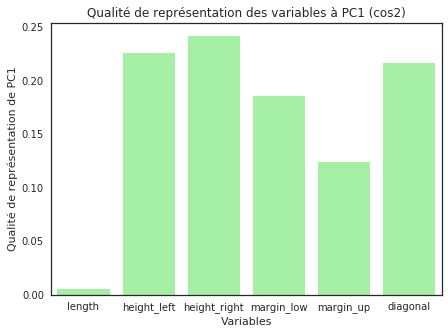

In [362]:
qual_repre_var_ind=qual_repre_var.reset_index()

f,ax = plt.subplots(figsize=(7,5))
qual_plot = sns.barplot(x='index',y='principal component 1',data=qual_repre_var_ind,color='palegreen')
ax.set_title('Qualité de représentation des variables à PC1 (cos2)')
ax.set_ylabel('Qualité de représentation de PC1')
ax.set_xlabel('Variables')

f.savefig('../presentation/images/qual_var_pc1')


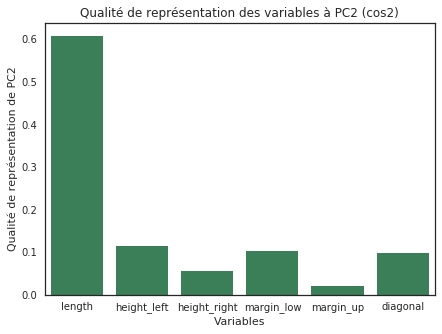

In [363]:
f,ax = plt.subplots(figsize=(7,5))
qual_plot = sns.barplot(x='index',y='principal component 2',data=qual_repre_var_ind,color='seagreen')
ax.set_title('Qualité de représentation des variables à PC2 (cos2)')
ax.set_ylabel('Qualité de représentation de PC2')
ax.set_xlabel('Variables')

f.savefig('../presentation/images/qual_var_pc2')


Lorsque l’angle est proche de 0, c'est-à-dire que le cosinus est proche de 1, la variable est bien représentée. 
Dans le cas inverse, l’angle est proche de 90°et le cosinus est proche de 0. 

## La contribution des individus 

In [364]:
#http://maths.cnam.fr/IMG/pdf/A-C-P-.pdf
valeur_contrib_indiv = np.square(reduction)/data_acp.shape[0]/pca.explained_variance_ratio_
df_contrib_indiv = pd.DataFrame(valeur_contrib_indiv,columns=['PC1','PC2','PC3'])
df_contrib_indiv['is_genuine'] = data_acp_ind['is_genuine']
df_contrib_indiv.index = df_contrib_indiv['is_genuine']
del df_contrib_indiv['is_genuine']
df_contrib_indiv

,PC1,PC2,PC3
is_genuine,,,
True,0.057502,0.068558,0.132031
True,0.055217,0.007413,0.012165
True,0.048268,0.000062,0.030472
True,0.052600,0.000213,0.011675
True,0.071599,0.004551,0.455360
True,0.018929,0.238418,0.037536
True,0.053606,0.035306,0.001212
True,0.085357,0.028984,0.047232
True,0.037376,0.001388,0.054348


In [365]:
df_contrib_indiv_plot = df_contrib_indiv.reset_index(drop=True)
df_contrib_indiv_plot['is_genuine']=data_acp_ind['is_genuine']
df_contrib_indiv_plot['Contrib indiv PC1 & PC2'] = df_contrib_indiv_plot['PC1'] + df_contrib_indiv_plot['PC2']


In [366]:
df_contrib_indiv_plot['PC1 explained variance']=data_acp_ind['PC1']
df_contrib_indiv_plot['PC2 explained variance']=data_acp_ind['PC2']


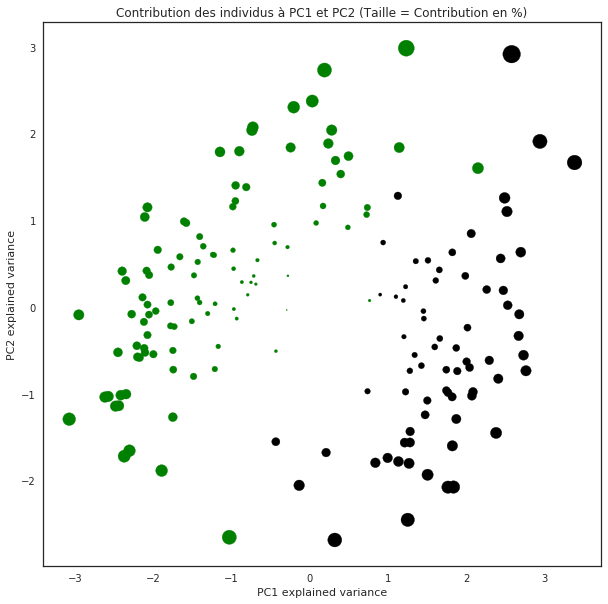

In [367]:
colors = {True : 'green',False:'Black'}
plot_contrib_indiv_pc1_pc2 = df_contrib_indiv_plot.plot(kind='scatter', x='PC1 explained variance',
                      y='PC2 explained variance',c=df_contrib_indiv_plot['is_genuine'].apply(lambda x: colors[x]),
                      s=df_contrib_indiv_plot['Contrib indiv PC1 & PC2']*1000,
                     figsize=(10,10),
                     )
plt.title('Contribution des individus à PC1 et PC2 (Taille = Contribution en %)')
image= plot_contrib_indiv_pc1_pc2.get_figure()
image.savefig('../presentation/images/contrib_indiv_PC1_PC2')

## Analyser la qualité de représentation des individus



In [368]:
df_contrib_indiv_sans_ind = df_contrib_indiv.reset_index(drop=True)

In [369]:
total = np.square(df_contrib_indiv_sans_ind).sum()
qual_repre_indiv = np.square(df_contrib_indiv_sans_ind)/total
qual_repre_indiv.head()

,PC1,PC2,PC3
0,0.009411,8.052012e-03,0.025230
1,0.008678,9.414808e-05,0.000214
2,0.006631,6.582406e-09,0.001344
3,0.007875,7.750904e-08,0.000197
4,0.014592,3.548498e-05,0.300107


In [370]:
qual_repre_indiv_plot = qual_repre_indiv.copy()
qual_repre_indiv_plot['is_genuine']=data_acp_ind['is_genuine']
qual_repre_indiv_plot['Contrib indiv PC1 & PC2'] = qual_repre_indiv_plot['PC1'] + qual_repre_indiv_plot['PC2']
qual_repre_indiv_plot['PC1 explained variance']=data_acp_ind['PC1']
qual_repre_indiv_plot['PC2 explained variance']=data_acp_ind['PC2']


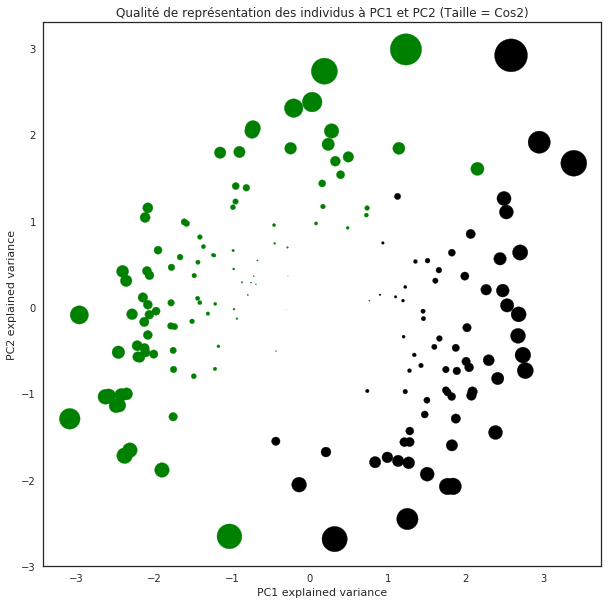

In [371]:
colors = {True : 'green',False:'Black'}
plot_qual_repre_indiv_pc1_pc2 = qual_repre_indiv_plot.plot(kind='scatter', x='PC1 explained variance',
                      y='PC2 explained variance',c=qual_repre_indiv_plot['is_genuine'].apply(lambda x: colors[x]),
                      s=qual_repre_indiv_plot['Contrib indiv PC1 & PC2']*10000,
                     figsize=(10,10),
                     )
plt.title('Qualité de représentation des individus à PC1 et PC2 (Taille = Cos2)')
image= plot_qual_repre_indiv_pc1_pc2.get_figure()
image.savefig('../presentation/images/qual_repre_indiv_PC1_PC2')

# Appliquer un algorithme de classification, puis analysez le résultat obtenu.



In [372]:
data_cah_ind = data.copy()
data_cah = data.copy()

In [373]:
data_cah_ind['is_genuine'] = data_cah_ind.index
del data_cah_ind['is_genuine']

In [374]:
X = data_cah_ind.values


cah = AgglomerativeClustering(n_clusters=2)
Y = pd.DataFrame(cah.fit_predict(X), columns=['cluster ID'])
result_cah = pd.concat([Y, data_cah], axis=1)
result_cah.head(10)

,cluster ID,length,height_left,height_right,margin_low,margin_up,diagonal,is_genuine
0,1,-0.428344,2.669454,3.096563,-0.131590,-1.189874,0.281633,True
1,0,-0.887559,-1.097697,-0.691254,-0.860126,-1.274740,0.780697,True
2,0,-0.362742,-1.030427,-0.509439,-0.303010,-1.232307,1.377405,True
3,0,-0.461145,-0.963156,-0.842767,-1.260106,-0.213913,1.149571,True
4,0,0.358883,-1.232238,-0.539742,0.611230,-3.820725,1.062777,True
5,0,2.064540,1.963113,1.551134,-0.103020,-0.765543,0.639657,True
6,0,1.441319,-1.736767,-0.388229,-0.917266,-1.147441,0.791547,True
7,0,-1.182769,-1.400415,-1.691238,-1.531521,0.083119,0.878340,True
8,0,0.063673,-1.871308,-0.539742,-0.788700,0.677182,1.041079,True
9,0,0.654093,0.920419,0.823873,0.025545,-0.638244,-0.108939,True


# Visualisez la partition obtenue dans le premier plan factoriel de l'ACP, puis analysez-la. 

In [375]:
a=data_acp_ind
b = a.join(result_cah['cluster ID'])


## Score réussite

In [376]:
X = "is_genuine"

Y = "cluster ID"


c = b[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len)

cont = c.copy()


tx = b[X].value_counts()

ty = b[Y].value_counts()


cont.loc[:,"Total"] = tx

cont.loc["total",:] = ty

cont.loc["total","Total"] = len(data)

cont

cluster ID,0,1,Total
is_genuine,,,
False,1.0,69.0,70.0
True,98.0,2.0,100.0
total,99.0,71.0,170.0


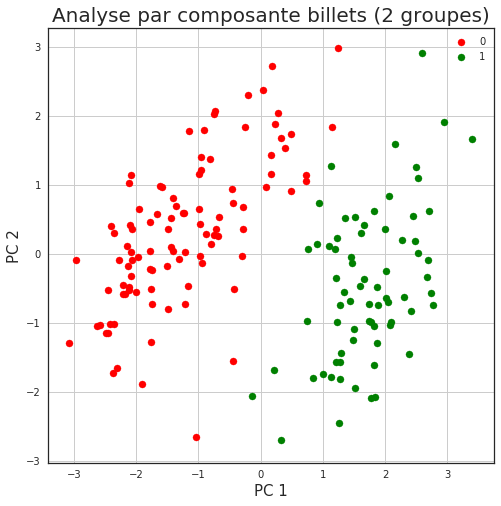

In [377]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel("PC 1", fontsize = 15)
ax.set_ylabel("PC 2", fontsize = 15)
ax.set_title('Analyse par composante billets (2 groupes)', fontsize = 20)

targets = [0,1]
colors = ['r', 'g']

for target, color in zip(targets,colors):
    indicesToKeep = b['cluster ID'] == target
    ax.scatter(b.loc[indicesToKeep, 'PC1']
               , b.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

#fig.savefig





# Appliquer un algorithme de classification (Kmeans), puis analysez le résultat obtenu.



In [378]:
data_kmeans_ind = data.copy()
data_kmeans = data.copy()

In [379]:
data_kmeans_ind['is_genuine'] = data_kmeans_ind.index
del data_kmeans_ind['is_genuine']

In [380]:
X = data_kmeans_ind.values


kmeans = KMeans(n_clusters=2)
Y = pd.DataFrame(kmeans.fit_predict(X), columns=['cluster ID'])
result_kmeans = pd.concat([Y, data_kmeans], axis=1)
result_kmeans.head(10)

,cluster ID,length,height_left,height_right,margin_low,margin_up,diagonal,is_genuine
0,0,-0.428344,2.669454,3.096563,-0.131590,-1.189874,0.281633,True
1,1,-0.887559,-1.097697,-0.691254,-0.860126,-1.274740,0.780697,True
2,1,-0.362742,-1.030427,-0.509439,-0.303010,-1.232307,1.377405,True
3,1,-0.461145,-0.963156,-0.842767,-1.260106,-0.213913,1.149571,True
4,1,0.358883,-1.232238,-0.539742,0.611230,-3.820725,1.062777,True
5,0,2.064540,1.963113,1.551134,-0.103020,-0.765543,0.639657,True
6,1,1.441319,-1.736767,-0.388229,-0.917266,-1.147441,0.791547,True
7,1,-1.182769,-1.400415,-1.691238,-1.531521,0.083119,0.878340,True
8,1,0.063673,-1.871308,-0.539742,-0.788700,0.677182,1.041079,True
9,0,0.654093,0.920419,0.823873,0.025545,-0.638244,-0.108939,True


# Visualisez la partition obtenue dans le premier plan factoriel de l'ACP, puis analysez-la.

In [381]:
a=data_acp_ind
b = a.join(result_kmeans['cluster ID'])
b.head()

,length,height_left,height_right,margin_low,margin_up,diagonal,is_genuine,PC1,PC2,PC3,cluster ID
0,-0.428344,2.669454,3.096563,-0.131590,-1.189874,0.281633,True,2.153639,1.599709,1.787451,0
1,-0.887559,-1.097697,-0.691254,-0.860126,-1.274740,0.780697,True,-2.110416,-0.526039,0.542563,1
2,-0.362742,-1.030427,-0.509439,-0.303010,-1.232307,1.377405,True,-1.973152,-0.048102,0.858716,1
3,-0.461145,-0.963156,-0.842767,-1.260106,-0.213913,1.149571,True,-2.059795,-0.089105,-0.531529,1
4,0.358883,-1.232238,-0.539742,0.611230,-3.820725,1.062777,True,-2.403180,0.412170,3.319507,1


## Tableau récapitulatif (contingence)

In [382]:
X = "is_genuine"

Y = "cluster ID"


c = b[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len)

cont = c.copy()


tx = b[X].value_counts()

ty = b[Y].value_counts()


cont.loc[:,"Total"] = tx

cont.loc["total",:] = ty

cont.loc["total","Total"] = len(data)

cont

cluster ID,0,1,Total
is_genuine,,,
False,69.0,1.0,70.0
True,7.0,93.0,100.0
total,76.0,94.0,170.0


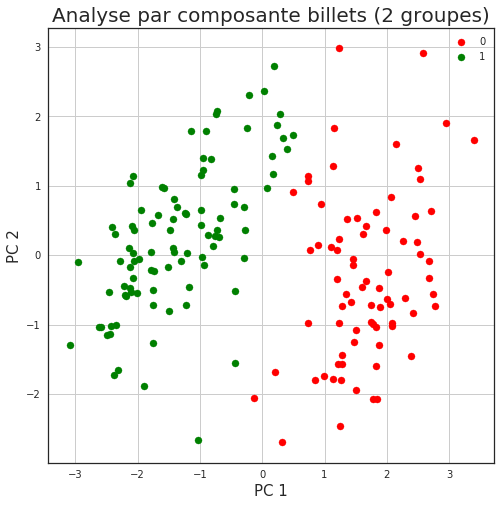

In [383]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel("PC 1", fontsize = 15)
ax.set_ylabel("PC 2", fontsize = 15)
ax.set_title('Analyse par composante billets (2 groupes)', fontsize = 20)

targets = [0,1]
colors = ['r', 'g']

for target, color in zip(targets,colors):
    indicesToKeep = b['cluster ID'] == target
    ax.scatter(b.loc[indicesToKeep, 'PC1']
               , b.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

fig.savefig('../presentation/images/acp_partition_kmeans')





# Modélisez les données à l'aide d'une régression logistique.

In [445]:
data_lr_ind = data.copy()
data_lr = data.copy() # Echantillon d'entrainement

In [446]:
data_lr_ind['is_genuine'] = data_lr_ind.index
del data_lr_ind['is_genuine']

In [447]:
X = data_lr_ind.values
y = data_lr['is_genuine']

logistic = LogisticRegression()
logistic.fit(X,y)

# Voir les indicateurs métrique (précision, rappel, score F1) --> Fait intervenir les notion de vrai positif et faux positif, vrai négatif et faux négatif

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [448]:
joblib.dump(logistic, '../code/algo_reg_log.pkl')

['../code/algo_reg_log.pkl']

In [449]:
conf = confusion_matrix(y, logistic.predict(X))
conf

array([[70,  0],
       [ 1, 99]])

In [450]:
classes = logistic.classes_
classes = classes.astype(str)
classes

array(['False', 'True'], dtype='<U5')

In [451]:
cf = pd.DataFrame(conf, columns=['prédit ' + _ for _ in classes])
cf.index = ['vrai ' + _ for _ in classes]
cf

,prédit False,prédit True
vrai False,70,0
vrai True,1,99


Les coefficients sur la diagonale indique les éléments bien classés, les coefficients en dehors indiquent ceux que le classifieur a mis dans la mauvaise classe.

On utilise le modèle pour prédire la classe d'une donnée

In [452]:
classesPredites = logistic.predict(X)
classesPredites

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

OU obtenir la probabilité pour cette donnée d'appartenir à chacune des 2 classes (True ou False)

In [453]:
probaClasses = logistic.predict_proba(X)
probaClasses.round(3)
# Ici le premier billet a plus de chance d'être vrai que faux

array([[0.142, 0.858],
       [0.002, 0.998],
       [0.003, 0.997],
       [0.001, 0.999],
       [0.001, 0.999],
       [0.054, 0.946],
       [0.001, 0.999],
       [0.001, 0.999],
       [0.02 , 0.98 ],
       [0.243, 0.757],
       [0.065, 0.935],
       [0.002, 0.998],
       [0.034, 0.966],
       [0.008, 0.992],
       [0.006, 0.994],
       [0.003, 0.997],
       [0.004, 0.996],
       [0.003, 0.997],
       [0.016, 0.984],
       [0.008, 0.992],
       [0.01 , 0.99 ],
       [0.011, 0.989],
       [0.037, 0.963],
       [0.018, 0.982],
       [0.01 , 0.99 ],
       [0.017, 0.983],
       [0.004, 0.996],
       [0.058, 0.942],
       [0.003, 0.997],
       [0.   , 1.   ],
       [0.006, 0.994],
       [0.001, 0.999],
       [0.026, 0.974],
       [0.051, 0.949],
       [0.036, 0.964],
       [0.044, 0.956],
       [0.003, 0.997],
       [0.001, 0.999],
       [0.001, 0.999],
       [0.005, 0.995],
       [0.002, 0.998],
       [0.023, 0.977],
       [0.007, 0.993],
       [0.0

## Distribution des scores

Un classifieur construit une frontière entre deux classes, la distance d’un point à la frontière consistue une information importante. Plus elle est grande, plus le modèle est confiant. Cette distance est souvent appelée score.

In [454]:
score = logistic.decision_function(X)
dfsc = pd.DataFrame(score, columns=['score'])
dfsc['classe'] = y
dfsc.head()



,score,classe
0,1.800974,True
1,6.266264,True
2,5.937662,True
3,6.509245,True
4,6.994190,True


Text(0.5,1,'Distribution des scores de classification des billets')

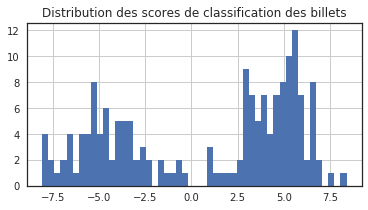

In [455]:
ax = dfsc['score'].hist(bins=50, figsize=(6,3))
ax.set_title('Distribution des scores de classification des billets')

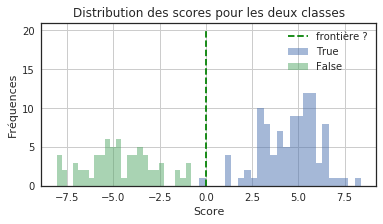

In [456]:
fig = plt.figure(figsize = (8,8))

ax = dfsc[dfsc['classe'] == True]['score'].hist(bins=25, figsize=(6,3), label='True', alpha=0.5)
dfsc[dfsc['classe'] == False]['score'].hist(bins=25, ax=ax, label='False', alpha=0.5)
ax.set_title("Distribution des scores pour les deux classes")
ax.plot([0, 0], [0, 20], 'g--', label="frontière ?")
ax.legend()
ax.set_ylabel('Fréquences')
ax.set_xlabel('Score')

fig.savefig('../presentation/images/distrib_score')



Il y a quelques confusions autour de 0 mais le modèle est pertinent au sens où la frontière entre les deux classes est assez nette : les deux cloches ne se superposent pas. Voyons avec les probabilités :

In [457]:
proba = logistic.predict_proba(X)[:, 1]
dfpr = pd.DataFrame(proba, columns=['proba'])
dfpr['classe'] = y
dfpr.head()

,proba,classe
0,0.858267,True
1,0.998104,True
2,0.997369,True
3,0.998513,True
4,0.999084,True


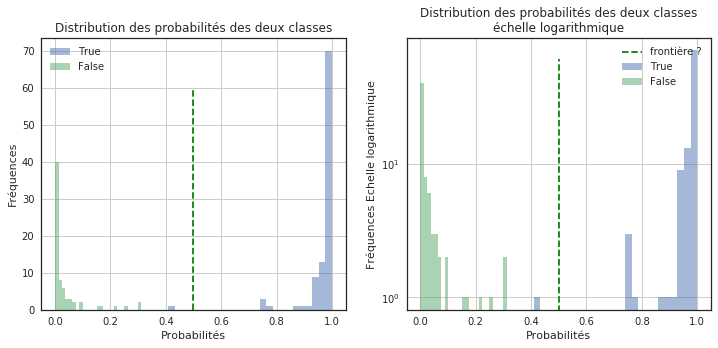

In [458]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))
dfpr[dfpr['classe'] == True]['proba'].hist(bins=25, label='True', alpha=0.5, ax=ax[0])
dfpr[dfpr['classe'] == False]['proba'].hist(bins=25, label='False', alpha=0.5, ax=ax[0])
ax[0].set_title('Distribution des probabilités des deux classes')
ax[0].legend()
ax[0].set_ylabel('Fréquences')
ax[0].set_xlabel('Probabilités');
dfpr[dfpr['classe'] == True]['proba'].hist(bins=25, label='True', alpha=0.5, ax=ax[1])
dfpr[dfpr['classe'] == False]['proba'].hist(bins=25, label='False', alpha=0.5, ax=ax[1])
ax[0].plot([0.5, 0.5], [0, 60], 'g--', label="frontière ?")
ax[1].plot([0.5, 0.5], [0, 60], 'g--', label="frontière ?")
ax[1].set_yscale('log')
ax[1].set_title('Distribution des probabilités des deux classes\néchelle logarithmique')
ax[1].legend()
ax[1].set_ylabel('Fréquences Echelle logarithmique')
ax[1].set_xlabel('Probabilités')
fig.savefig('../presentation/images/distrib_prob')


Courbe ROC et AUC classe 0

Plus l’aire commune aux deux distributions est petite, plus le modèle est confiant. Cette aire commune est reliée à la courbe ROC

In [459]:
probas = logistic.predict_proba(X)
fpr0, tpr0, thresholds0 = roc_curve(y, probas[:, 0], pos_label=logistic.classes_[0], drop_intermediate=False)


fpr désigne le False Positive Rate autrement dit le taux de faux positive, si la tâche est déterminer si un billet est vrai, le taux désigne la proportion de faux billets classés par le classifieur parmi les vrais billets. C’est l’erreur de classification. 

tpr désigne le nombre de True Positive Rate. Si la tâche est déterminer si un billet est vrai, le taux désigne la proportion de vrais billets classés par le classifieur parmi les vrais billets.

In [460]:
dftp = pd.DataFrame(dict(fpr=fpr0, tpr=tpr0, threshold=thresholds0)).copy()
dftp.head()

/usr/local/lib/python3.5/dist-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


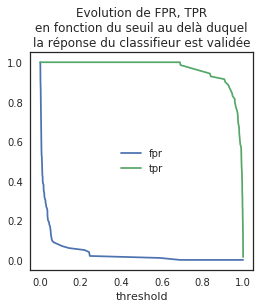

In [461]:
ax = dftp.plot(x="threshold", y=['fpr', 'tpr'], figsize=(4, 4))
ax.set_title("Evolution de FPR, TPR\nen fonction du seuil au delà duquel\n" +
            "la réponse du classifieur est validée");
image= ax.get_figure()
image.savefig('../presentation/images/dftp')

''

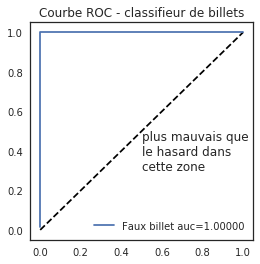

In [462]:
fig, ax = plt.subplots(1, 1, figsize=(4,4))
ax.plot([0, 1], [0, 1], 'k--')
# aucf = roc_auc_score(y == logistic.classes_[0], probas[:, 0]) # première façon
aucf = auc(fpr0, tpr0)  # seconde façon
ax.plot(fpr0, tpr0, label='Faux billet auc=%1.5f' % aucf)
ax.set_title('Courbe ROC - classifieur de billets')
ax.text(0.5, 0.3, "plus mauvais que\nle hasard dans\ncette zone")
ax.legend()
fig.savefig('../presentation/images/courbe_roc')
;

La mesure AUC ou Area Under the Curve est l’aire sous la courbe. Elle est égale à la probabilité que le score d’un exemple classé 'faux billet'  à raison soit inférieur à un exemple classé 'faux billet' à tort.


Deux autres métriques sont très utilisées, la précision et le rappel. Pour chaque classifieur, on peut déterminer un seuil s au delà duquel la réponse est validée avec une bonne confiance. Parmi toutes les réponses validées, la précision est le nombre de réponses correctes rapporté au nombre de réponses validées, le rappel est le nombre de réponses correctes rapportées à toutes qui aurait dû être validées. On calcule aussi la métrique F1 qui est une moyenne harmonique entre les deux.

Précision, Recall, Score F1 Classe 0

In [463]:
precision, recall, thresholds = precision_recall_curve(y, probas[:, 0], pos_label=logistic.classes_[0])


In [464]:
dfpr = pd.DataFrame(dict(precision=precision, recall=recall,
                             threshold=[0] + list(thresholds)))
dfpr['F1']= 2 * (dfpr.precision * dfpr.recall) / (dfpr.precision + dfpr.recall)
dfpr.head()

,precision,recall,threshold,F1
0,1.0,1.000000,0.000000,1.000000
1,1.0,0.985714,0.688536,0.992806
2,1.0,0.971429,0.691091,0.985507
3,1.0,0.957143,0.739963,0.978102
4,1.0,0.942857,0.787925,0.970588


/usr/local/lib/python3.5/dist-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


''

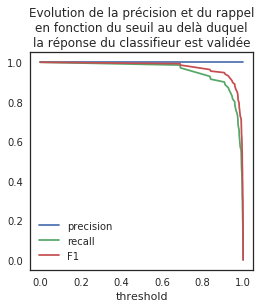

In [465]:
ax = dfpr.plot(x="threshold", y=['precision', 'recall', 'F1'], figsize=(4, 4))
ax.set_title("Evolution de la précision et du rappel\nen fonction du seuil au delà duquel\n" +
             "la réponse du classifieur est validée")
image= ax.get_figure()
image.savefig('../presentation/images/dfpr')
;

Précision, Recall, Score F1 Classe 1

In [466]:
precision, recall, thresholds = precision_recall_curve(y, probas[:, 1], pos_label=logistic.classes_[1])
dfpr = pd.DataFrame(dict(precision=precision, recall=recall,
                             threshold=[1] + list(thresholds)))
dfpr['F1']= 2 * (dfpr.precision * dfpr.recall) / (dfpr.precision + dfpr.recall)
dfpr.head()

,precision,recall,threshold,F1
0,1.0,1.00,1.000000,1.000000
1,1.0,0.99,0.409524,0.994975
2,1.0,0.98,0.755449,0.989899
3,1.0,0.97,0.757465,0.984772
4,1.0,0.96,0.759269,0.979592


/usr/local/lib/python3.5/dist-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


''

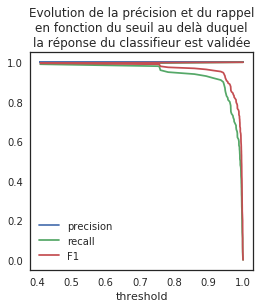

In [467]:
ax = dfpr.plot(x="threshold", y=['precision', 'recall', 'F1'], figsize=(4, 4))
ax.set_title("Evolution de la précision et du rappel\nen fonction du seuil au delà duquel\n" +
             "la réponse du classifieur est validée")
image= ax.get_figure()
image.savefig('../presentation/images/dfpr')
;

# Grâce à celle-ci, vous créerez un programme capable d'effectuer une prédiction sur un billet, c'est-à-dire de déterminer s'il s'agit d'un vrai ou d'un faux billet. Pour chaque billet, votre algorithme de classification devra donner la probabilité que le billet soit vrai. Si cette probabilité est supérieure ou égale à 0.5, le billet sera considéré comme vrai. Dans le cas contraire, il sera considéré comme faux.

## Dataframe test

In [468]:
echantillon_test = data.copy()
del echantillon_test['is_genuine']

In [469]:
a = pd.Series(probaClasses[:,1],name='probas')
test =pd.concat([echantillon_test,a],axis=1)

test['verif']=test['probas'] >=0.5
test



,length,height_left,height_right,margin_low,margin_up,diagonal,probas,verif
0,-0.428344,2.669454,3.096563,-0.131590,-1.189874,0.281633,0.858267,True
1,-0.887559,-1.097697,-0.691254,-0.860126,-1.274740,0.780697,0.998104,True
2,-0.362742,-1.030427,-0.509439,-0.303010,-1.232307,1.377405,0.997369,True
3,-0.461145,-0.963156,-0.842767,-1.260106,-0.213913,1.149571,0.998513,True
4,0.358883,-1.232238,-0.539742,0.611230,-3.820725,1.062777,0.999084,True
5,2.064540,1.963113,1.551134,-0.103020,-0.765543,0.639657,0.945518,True
6,1.441319,-1.736767,-0.388229,-0.917266,-1.147441,0.791547,0.998530,True
7,-1.182769,-1.400415,-1.691238,-1.531521,0.083119,0.878340,0.998518,True
8,0.063673,-1.871308,-0.539742,-0.788700,0.677182,1.041079,0.980190,True
9,0.654093,0.920419,0.823873,0.025545,-0.638244,-0.108939,0.757465,True


En résumé, définir une fonction qui :
- récupère l'échantillon test
- extrait les valeurs
- passe la matrice dans le modèle de regression linéaire
- récupérer la colonne (probabilité que le billet soit classé dans True
- ajouter cette colonne au dataframe test
- ajouter une colonne qui vérifiera la condition de probabilité 

# Montrer graphiquement les resultats des décisions du modèle

In [470]:
data_training = b.copy()
data_training=data_training.loc[:,['is_genuine', 'PC1','PC2']]
data_training_ind = data_training.copy()

In [471]:
data_training_ind['is_genuine'] = data_training_ind.index
del data_training_ind['is_genuine']

In [472]:
X = data_training_ind.values
y = data_training['is_genuine']

logistic_plot = LogisticRegression()
logistic_plot.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [473]:
joblib.dump(logistic_plot, '../code/algo_reg_log_plot.pkl')

['../code/algo_reg_log_plot.pkl']

In [474]:
xx, yy = np.mgrid[-5:5:.01, -5:5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]


probs = logistic_plot.predict_proba(grid)[:,1].reshape(xx.shape) #probabilité d'appartenir à True

[Text(0,0.5,'PC2'), Text(0.5,0,'PC1'), None]

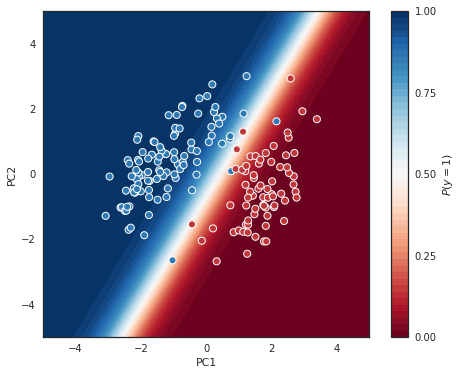

In [475]:
f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs,50, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(data_training['PC1'], data_training['PC2'], c=y, s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       
       xlabel="PC1", ylabel="PC2")